# Análisis estadísticos de viabilidad 
#### Grupo IP Pilar Sánchez-Testillano
#### Yolanda Pérez
#### NGS/MAY2023

Este codigo fue programado para:
* `python 3.6.5`
* `statsmodels`
* `pingouin`
* `matplotlib`
* `numpy`
* `pandas`

Objetivos:

a) Exploración de datos de viabilidad, 


b) Test de varianzas ANOVA con repeticiones, 


c) post-hoc test con correcciones para estimar diferencias entre categorías de polen 2 a 2


* **A1**
* **A2**
* **CONGELADOS - AC1, AC2**
* **B2** 
* **PETER**
* **ESPECIAL** 
* **CONTROL POSITIVO / NEGATIVO EN BNAPUS** 
---

Cargado de módulos y librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot


Importación de datos, división en función del experimento

In [ ]:

##############################################################
# Data import

#data = pd.read_excel("H:\\resumen_y cuentas_viabilidad_polen.xlsx", sheet_name="Final_results_no_cropping")

data = pd.read_excel("D:\\POLEN PISTACHO 2024\\resultados_conteo_programa.xlsx")
viability_general = data[["experiment", "pollen", "Viability"]]

viability_general["pollen"] = viability_general["pollen"].astype(str)


---
# Exploratory data analysis

In [3]:
viability_general = viability_general.drop(viability_general[(viability_general["experiment"]== "PETER") | (viability_general["experiment"] == "ESPECIAL")].index, axis=0)

In [9]:
viability_general = viability_general.drop(viability_general[(viability_general["pollen"]== "neg") | (viability_general["pollen"] == "pos")| (viability_general["pollen"] == "NEW")].index, axis=0)

In [10]:
mean_viab = viability_general.groupby(["pollen", "experiment"], as_index=False).agg("mean")
#mean_viab.pivot(index="pollen", columns="experiment", values="Viability")

In [11]:
mean_viab = mean_viab.pivot(index="pollen", columns="experiment", values="Viability")
mean_viab

experiment,A1,A2,AC1,AC2,B2
pollen,,,,,
1,82.507807,86.310605,75.917642,80.443273,81.137531
2,18.705031,52.917435,25.802802,42.221401,0.132915
3,83.481708,71.735472,88.319462,88.872834,70.487241
4,87.534020,80.608628,90.803351,85.541058,59.224955
5,85.581582,72.260952,85.487443,84.747662,66.383346


<Axes: xlabel='experiment', ylabel='pollen'>

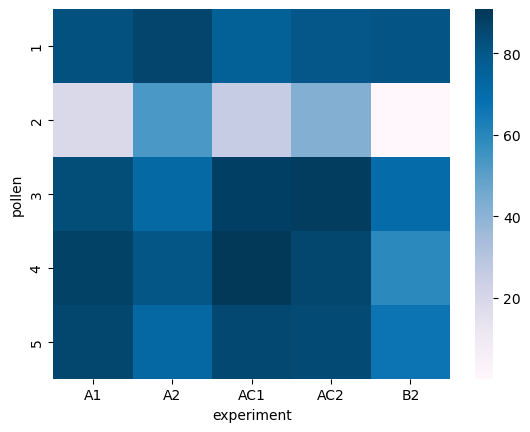

In [12]:
sns.heatmap(mean_viab,cmap="PuBu")


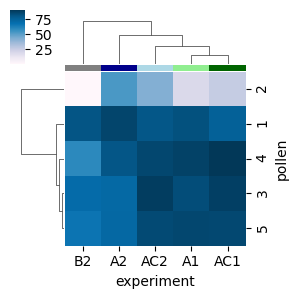

In [13]:
sns.clustermap(mean_viab, figsize=(3,3), col_colors=["#90EE90","#00008B","#006400","#ADD8E6","grey"],cmap="PuBu")


# Per pollen

C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(8.097222222222223, 0.5, '% Viabilidad')

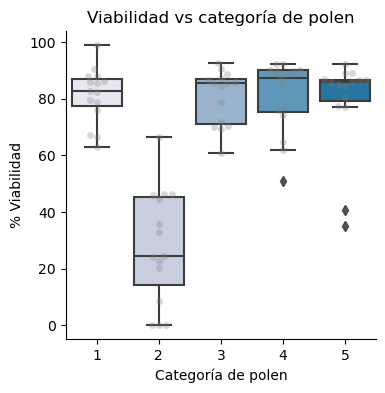

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_title('Viabilidad vs categoría de polen', y=1)
sns.boxplot(x="pollen", y="Viability", data=viability_general, palette = sns.color_palette("PuBu"))
sns.swarmplot(x="pollen", y="Viability", data=viability_general,color='grey', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Categoría de polen")
ax.set_ylabel("% Viabilidad")


C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


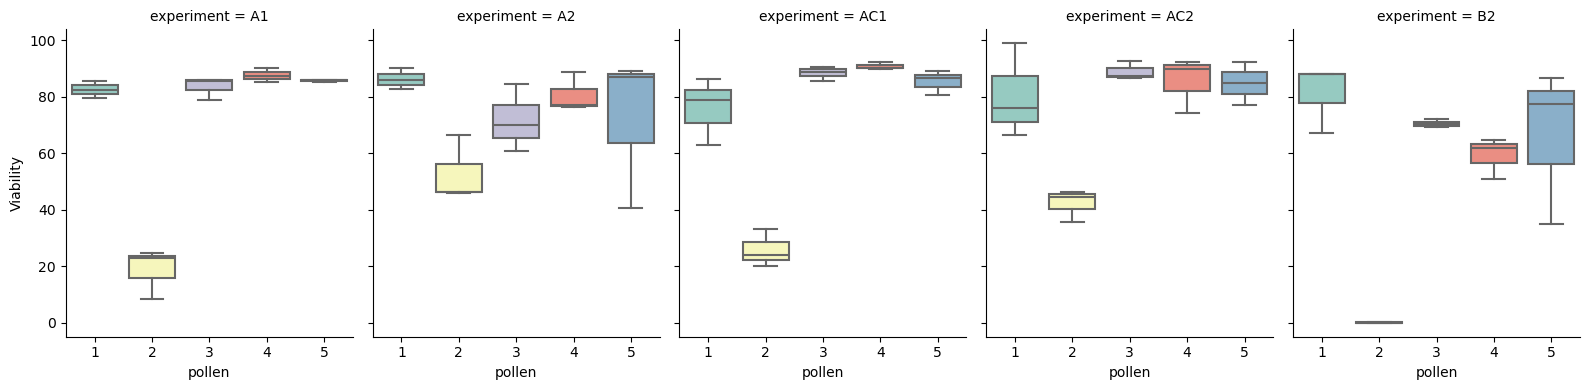

In [15]:
g = sns.FacetGrid(viability_general, col="experiment", height=4, aspect=.8, )
g.map(sns.boxplot,"pollen", "Viability", palette=sns.color_palette("Set3"))

C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


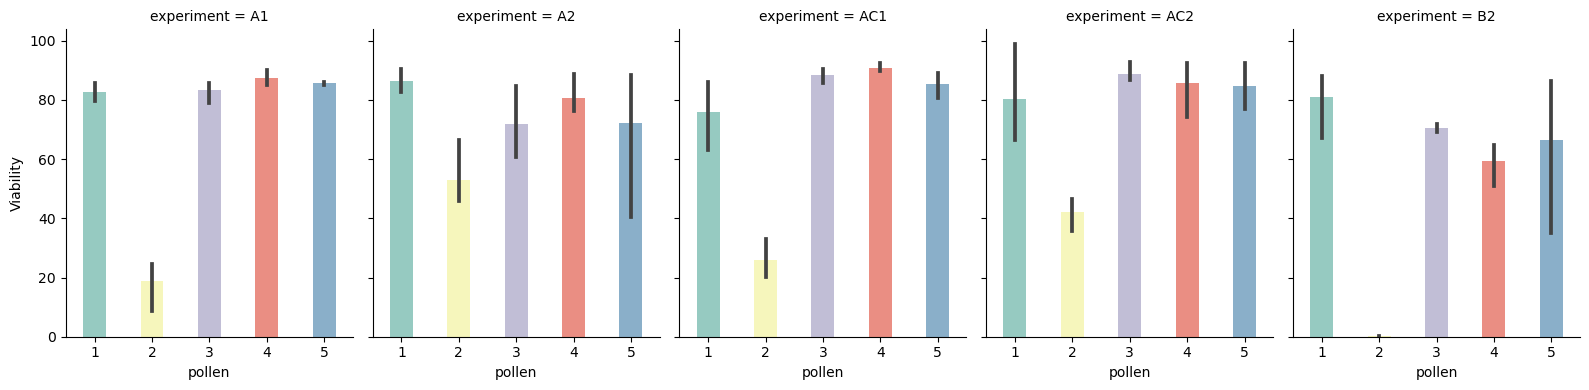

In [16]:
g = sns.FacetGrid(viability_general, col="experiment", height=4, aspect=.8, )
g.map(sns.barplot,"pollen", "Viability", palette=sns.color_palette("Set3"), width = 0.4)

C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


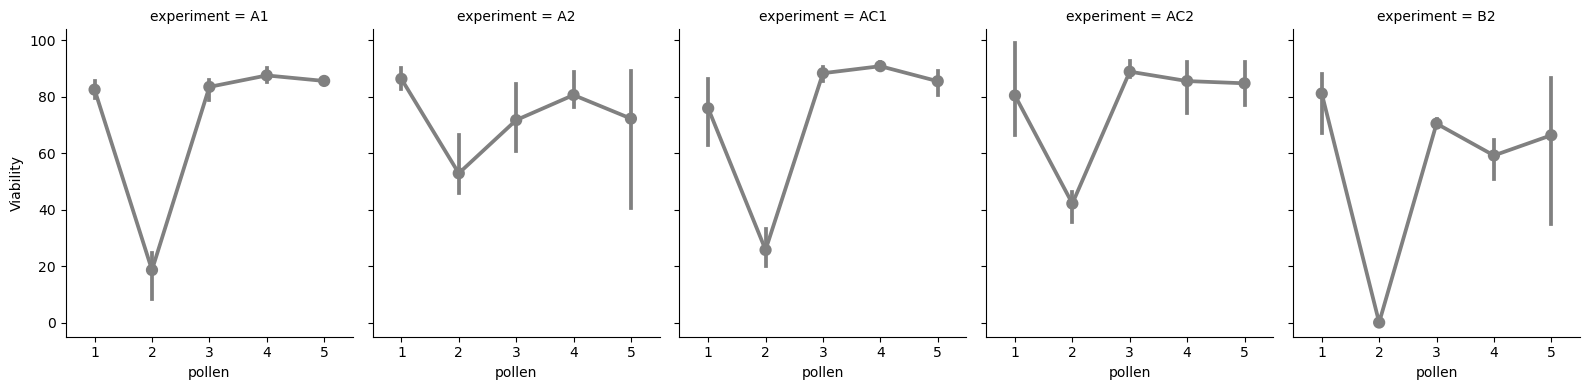

In [17]:
g = sns.FacetGrid(viability_general, col="experiment", height=4, aspect=.8)
g.map(sns.pointplot,"pollen", "Viability",color="grey", linestyles=["-"])

# Per experiment

C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(8.097222222222223, 0.5, '% Viabilidad')

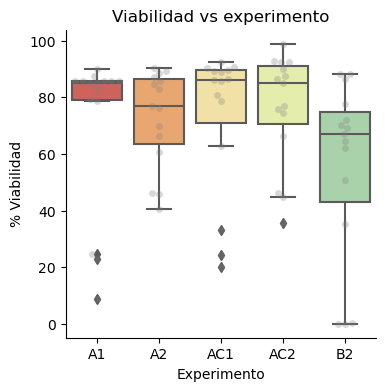

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_title('Viabilidad vs experimento', y=1)
sns.boxplot(x="experiment", y="Viability", data=viability_general, palette = sns.color_palette("Spectral"))
sns.swarmplot(x="experiment", y="Viability", data=viability_general,color='grey', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Experimento")
ax.set_ylabel("% Viabilidad")
#plt.savefig("C:\\Users\\naata\\Downloads\\boxplot_viabilidad_pollen_evans_2.jpg", bbox_inches = "tight", dpi=300)

C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


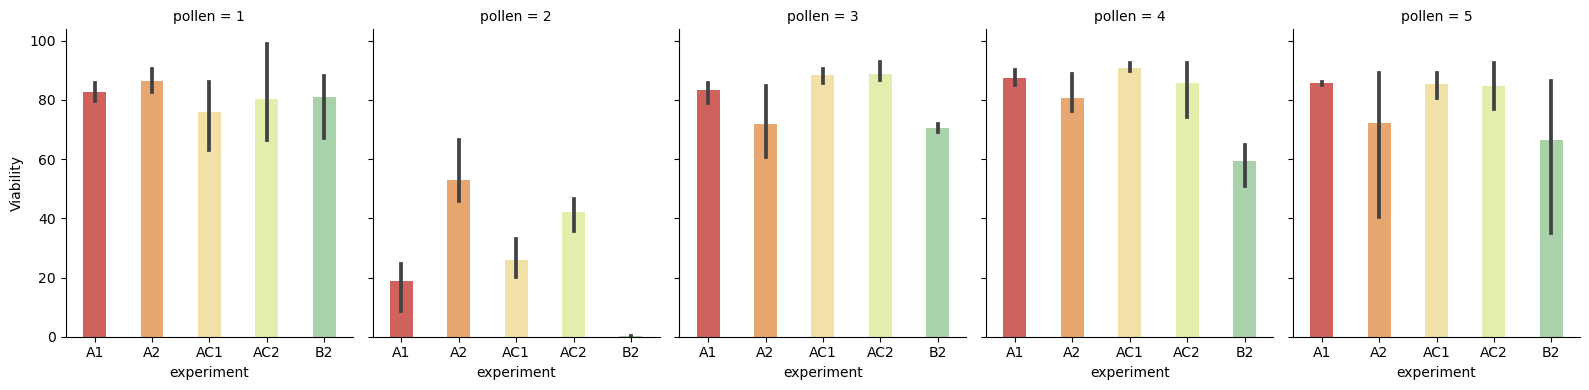

In [19]:
g = sns.FacetGrid(viability_general, col="pollen", height=4, aspect=.8)
g.map(sns.barplot,"experiment", "Viability",palette=sns.color_palette("Spectral"), width=0.4)

C:\Users\Usuario\miniconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


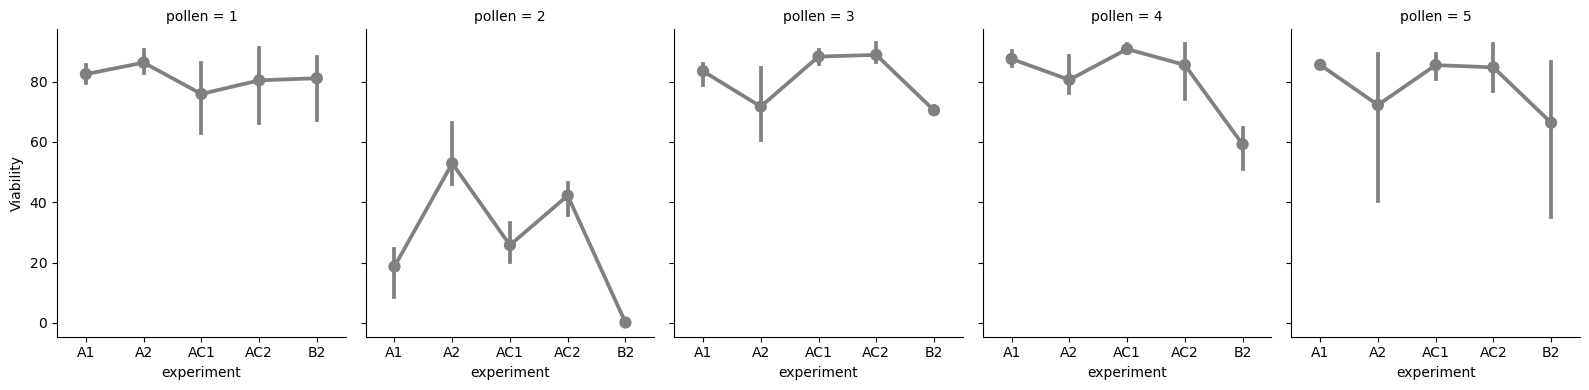

In [20]:
g = sns.FacetGrid(viability_general, col="pollen", height=4, aspect=.8)
g.map(sns.pointplot,"experiment", "Viability",color="grey", linestyles=["-"])

Test de supuestos de anova

check normality

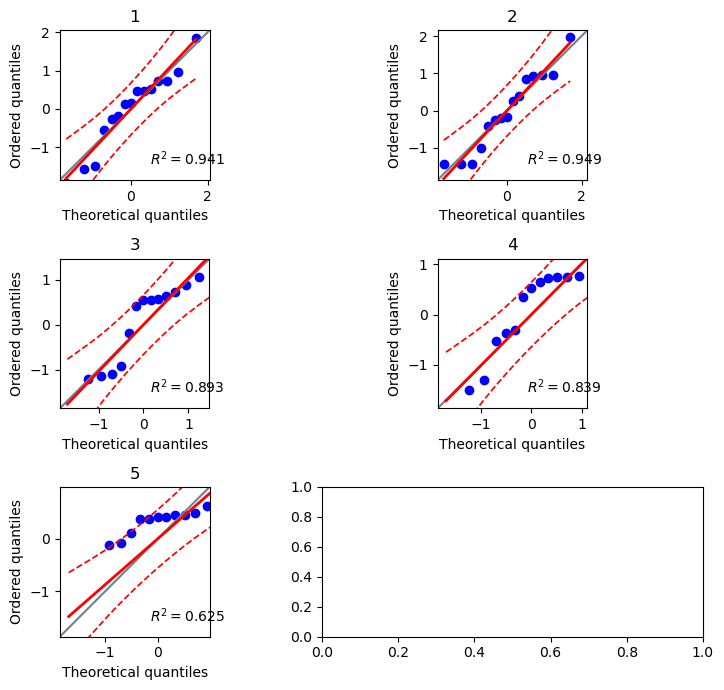

In [21]:
# Gráficos qqplot
# ==============================================================================
fig, axs = plt.subplots(3, 2, figsize=(8, 7))
pg.qqplot(viability_general.loc[viability_general.pollen=='1', 'Viability'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('1')
pg.qqplot(viability_general.loc[viability_general.pollen=='2', 'Viability'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('2')
pg.qqplot(viability_general.loc[viability_general.pollen=='3', 'Viability'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('3')
pg.qqplot(viability_general.loc[viability_general.pollen=='4', 'Viability'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('4')
pg.qqplot(viability_general.loc[viability_general.pollen=='5', 'Viability'], dist='norm', ax=axs[2,0])
axs[2,0].set_title('5')


plt.tight_layout()

In [3]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=viability_general, dv='Viability')
#pg.normality(data=ttc_viability, dv='Viability', group='rep')


NameError: name 'viability_general' is not defined

In [22]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=viability_general, dv='Viability', group='pollen')
#pg.normality(data=ttc_viability, dv='Viability', group='rep')


,W,pval,normal
pollen,,,
1,0.942764,0.418398,True
2,0.937647,0.353701,True
3,0.884895,0.056169,True
4,0.832604,0.009943,False
5,0.637002,0.000057,False


In [24]:
# VARIANZA CONSTANTE ENTRE GRUPOS
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=viability_general, dv='Viability', group='pollen', method='levene')


,W,pval,equal_var
levene,1.607513,0.182047,True


In [23]:
pg.sphericity(viability_general[["pollen", "Viability"]], method='jns')

(True, nan, nan, 1, 1.0)

# anova

1 way sin repetición (sin incluir variación por replicas tecnicas)

In [25]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
output_anova = pg.anova(data=viability_general,  dv='Viability', between='pollen', detailed=True)


In [26]:
output_anova

,Source,SS,DF,MS,F,p-unc,np2
0,pollen,33013.456703,4,8253.364176,39.139775,3.533771e-17,0.69103
1,Within,14760.828020,70,210.868972,NaN,NaN,NaN


In [27]:
# Si la esfericidad no se cumple, hay que utilizar el p-value corregido, que está en la columna p-GG-corr.
# De lo contrario, se valora la columna p-unc

if "sphericity" in output_anova.columns[:] and output_anova.iloc[0]["sphericity"] == False:
    pval = output_anova.iloc[0]["p-GG-corr"]
else:
    pval = output_anova.iloc[0]["p-unc"]

1 way con repetición (sin incluir variación por replicas tecnicas)

# Post-hoc

## Tukey

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
out_tukey = pairwise_tukeyhsd(viability_general["Viability"], viability_general["pollen"], alpha=0.05)
#display results
print(out_tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -53.3075    0.0 -68.1551 -38.4598   True
     1      3   -0.684 0.9999 -15.5317  14.1636  False
     1      4   -0.521    1.0 -15.3686  14.3267  False
     1      5  -2.3712 0.9915 -17.2188  12.4765  False
     2      3  52.6234    0.0  37.7758  67.4711   True
     2      4  52.7865    0.0  37.9388  67.6341   True
     2      5  50.9363    0.0  36.0886  65.7839   True
     3      4   0.1631    1.0 -14.6846  15.0107  False
     3      5  -1.6871 0.9977 -16.5348  13.1605  False
     4      5  -1.8502 0.9967 -16.6978  12.9974  False
------------------------------------------------------


---
# Por experimento

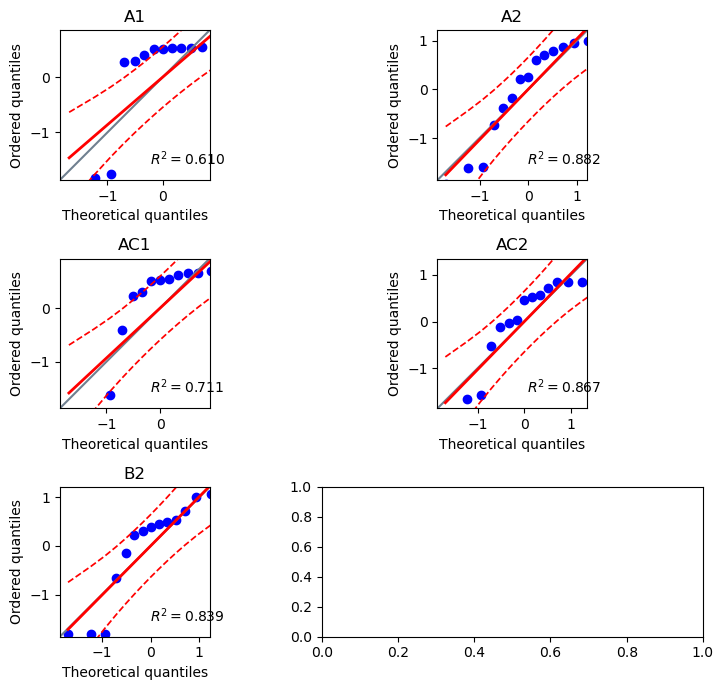

In [29]:
# Gráficos qqplot
# ==============================================================================
fig, axs = plt.subplots(3, 2, figsize=(8, 7))
pg.qqplot(viability_general.loc[viability_general.experiment=='A1', 'Viability'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('A1')
pg.qqplot(viability_general.loc[viability_general.experiment=='A2', 'Viability'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('A2')
pg.qqplot(viability_general.loc[viability_general.experiment=='AC1', 'Viability'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('AC1')
pg.qqplot(viability_general.loc[viability_general.experiment=='AC2', 'Viability'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('AC2')
pg.qqplot(viability_general.loc[viability_general.experiment=='B2', 'Viability'], dist='norm', ax=axs[2,0])
axs[2,0].set_title('B2')


plt.tight_layout()

In [32]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=viability_general, dv='Viability', group='experiment')
#pg.normality(data=ttc_viability, dv='Viability', group='rep')


,W,pval,normal
experiment,,,
A1,0.611591,0.000033,False
A2,0.862230,0.025992,False
AC1,0.702362,0.000263,False
AC2,0.858844,0.023224,False
B2,0.819773,0.006670,False


In [33]:
# VARIANZA CONSTANTE ENTRE GRUPOS
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=viability_general, dv='Viability', group='experiment', method='levene')


,W,pval,equal_var
levene,0.431358,0.785509,True


In [34]:
pg.sphericity(viability_general[["experiment", "Viability"]], method='jns')

(True, nan, nan, 1, 1.0)

# anova

1 way sin repetición (sin incluir variación por replicas tecnicas)

In [35]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
output_anova = pg.anova(data=viability_general,  dv='Viability', between='experiment', detailed=True)


In [36]:
output_anova

,Source,SS,DF,MS,F,p-unc,np2
0,experiment,4083.628174,4,1020.907043,1.63567,0.17497,0.085478
1,Within,43690.656549,70,624.152236,NaN,NaN,NaN


In [38]:
# Test ANOVA de una vía REPEATED MEASURES (One-way ANOVA)
# ==============================================================================
# otput_anova = pg.rm_anova(data=evans_viability,  dv='Viability', subject='rep', within="pollen", correction=False, detailed=False)
# output_anovau

## Tukey

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
out_tukey = pairwise_tukeyhsd(viability_general["Viability"], viability_general["experiment"], alpha=0.05)
#display results
print(out_tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A1     A2   1.2046 0.9999 -24.3399  26.749  False
    A1    AC1   1.7041 0.9997 -23.8403 27.2486  False
    A1    AC2   4.8032 0.9844 -20.7412 30.3477  False
    A1     B2 -16.0888 0.4028 -41.6333  9.4556  False
    A2    AC1   0.4995    1.0 -25.0449  26.044  False
    A2    AC2   3.5986 0.9948 -21.9458 29.1431  False
    A2     B2 -17.2934 0.3292 -42.8379   8.251  False
   AC1    AC2   3.0991 0.9971 -22.4453 28.6435  False
   AC1     B2 -17.7929  0.301 -43.3374  7.7515  False
   AC2     B2  -20.892 0.1603 -46.4365  4.6524  False
-----------------------------------------------------


In [ ]:

# create a excel writer object
with pd.ExcelWriter("C:\\Users\\naata\\Downloads\\output_viability_all.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    output_anova.to_excel(writer, sheet_name="anova_and_datachecks", index=False)
    df_exp.to_excel(writer, sheet_name="summary_viability", index=False)
    output_pairwise.to_excel(writer, sheet_name="paiwise_tests", index=False)
    output_anova2.to_excel(writer, sheet_name="anova_noBn", index=False)
    

# TEST ANOVA DOS VIAS


In [40]:
# Test ANOVA de dos vías (Two-way ANOVA)

# ==============================================================================
output_anova = pg.rm_anova(
    data       = viability_general,
    dv         = 'Viability',
    within     = 'pollen',
    subject    = 'experiment',
    detailed   = True,
    correction = 'auto'
)

output_anova


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,pollen,11004.485568,4,2751.121392,26.524102,6.915028e-07,0.78462,0.448624
1,Error,1659.545075,16,103.721567,NaN,NaN,NaN,NaN


In [41]:
# Test ANOVA de dos vías (Two-way ANOVA)

# ==============================================================================
output_anova = pg.rm_anova(
    data       = viability_general,
    dv         = 'Viability',
    within     = 'experiment',
    subject    = 'pollen',
    detailed   = True,
    correction = 'auto'
)

output_anova


,Source,SS,DF,MS,F,p-unc,ng2,eps
0,experiment,1361.209391,4,340.302348,3.280922,0.038213,0.097054,0.448624
1,Error,1659.545075,16,103.721567,NaN,NaN,NaN,NaN


In [42]:
viability_general.anova(
    dv         = 'Viability',
   between = ["pollen","experiment"])

,Source,SS,DF,MS,F,p-unc,np2
0,pollen,33013.456703,4,8253.364176,72.416167,3.521137e-20,0.852796
1,experiment,4083.628174,4,1020.907043,8.957581,1.554247e-05,0.417455
2,pollen * experiment,4978.635226,16,311.164702,2.730202,3.452797e-03,0.466287
3,Residual,5698.564620,50,113.971292,NaN,NaN,NaN


diseño experimental equilibrado (misma muestra poblacional para los dos factores)

Post hoc entre todo todo todo

In [44]:
viability_generalppe = viability_general
viability_generalppe["factor_mezclado"] = viability_generalppe["experiment"]+"+"+viability_generalppe["pollen"]

In [45]:
viability_generalppe

,experiment,pollen,Viability,factor_mezclado
0,A1,1,82.410423,A1+1
1,A1,1,85.588559,A1+1
2,A1,1,79.524439,A1+1
3,A1,2,22.837586,A1+2
4,A1,2,24.665552,A1+2
...,...,...,...,...
70,B2,4,62.030376,B2+4
71,B2,4,50.924296,B2+4
72,B2,5,35.162214,B2+5
73,B2,5,86.447716,B2+5


In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
out_tukey = pairwise_tukeyhsd(viability_generalppe["Viability"], viability_generalppe["factor_mezclado"], alpha=0.05)
#display results
print(out_tukey)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
  A1+1   A1+2 -63.8028    0.0  -97.5304 -30.0752   True
  A1+1   A1+3   0.9739    1.0  -32.7537  34.7015  False
  A1+1   A1+4   5.0262    1.0  -28.7014  38.7538  False
  A1+1   A1+5   3.0738    1.0  -30.6538  36.8014  False
  A1+1   A2+1   3.8028    1.0  -29.9248  37.5304  False
  A1+1   A2+2 -29.5904 0.1594   -63.318   4.1372  False
  A1+1   A2+3 -10.7723 0.9999     -44.5  22.9553  False
  A1+1   A2+4  -1.8992    1.0  -35.6268  31.8284  False
  A1+1   A2+5 -10.2469 0.9999  -43.9745  23.4808  False
  A1+1  AC1+1  -6.5902    1.0  -40.3178  27.1375  False
  A1+1  AC1+2  -56.705    0.0  -90.4326 -22.9774   True
  A1+1  AC1+3   5.8117    1.0   -27.916  39.5393  False
  A1+1  AC1+4   8.2955    1.0  -25.4321  42.0232  False
  A1+1  AC1+5   2.9796    1.0   -30.748  36.7073  False
  A1+1  AC2+1  -2.0645    1.0  -35.7922  31.6631